# Monte Carlo Simulation
Objectives:
- Standard normal distribution
- Student-t distribution

### Standard normal distribution

In [21]:
import yfinance as yf
symbol = 'AAPL'
orig = yf.download([symbol], start="2020-01-01", end="2024-12-31")
orig = orig[('Close')]
orig.tail()

/var/folders/b8/hq7p21n142n321y966q8j1600000gn/T/ipykernel_64517/3780767046.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  orig = yf.download([symbol], start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2024-12-23,254.655716
2024-12-24,257.578674
2024-12-26,258.396667
2024-12-27,254.974930
2024-12-30,251.593094


array([[<Axes: title={'center': 'AAPL'}>]], dtype=object)

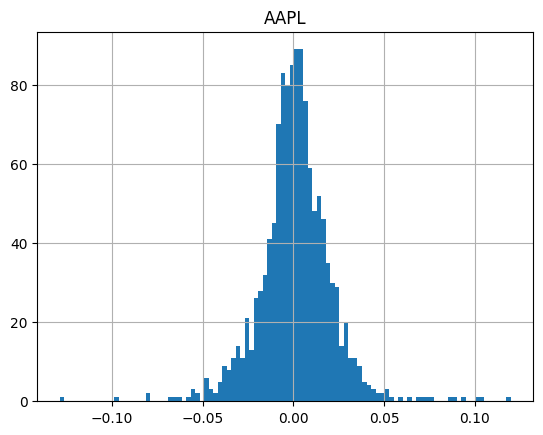

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
returns = orig.pct_change()
last_price = orig.iloc[-1,0]
returns.hist(bins=100)

In [29]:
last_price

251.5930938720703

In [30]:
daily_volatility = returns.std()
rtn = np.random.normal(0, daily_volatility)

In [31]:
price = last_price * (1  + rtn)
price

array([252.36180754])

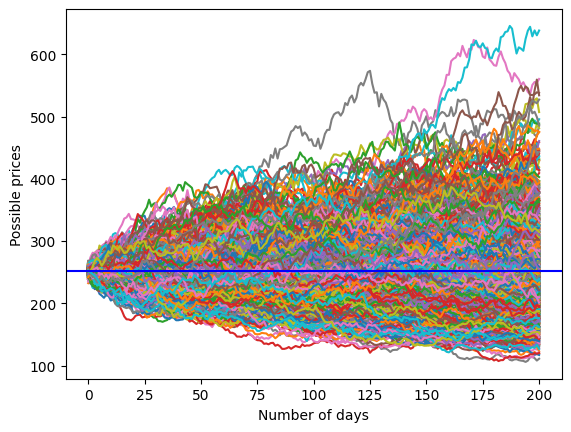

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

num_simulations = 1000
num_days = 200
simulation_df = pd.DataFrame()
for x in range(num_simulations):
    count = 0
    # The first price point
    price_series = []
    rtn = np.random.normal(0, daily_volatility)
    price = last_price * (1  + rtn)
    price_series.append(price)
    # Create each price path
    for g in range(num_days):
        rtn = np.random.normal(0, daily_volatility)
        price = price_series[g] * (1  + rtn)
        price_series.append(price)
    # Save all the possible price paths
    simulation_df[x] = price_series
fig = plt.figure()
plt.plot(simulation_df)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()

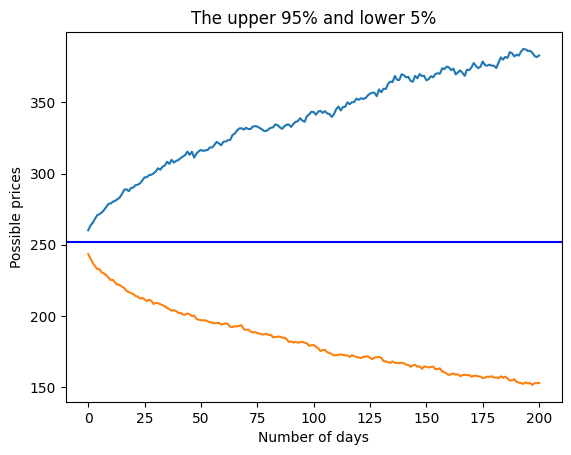

In [33]:
upper = simulation_df.quantile(.95, axis=1)
lower = simulation_df.quantile(.05, axis=1)
stock_range = pd.concat([upper, lower], axis=1)

fig = plt.figure()
plt.plot(stock_range)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.title('The upper 95% and lower 5%')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()

### Student-t distribution

In [34]:
returns = orig.pct_change()

In [35]:
returns[1::] # Drop the first element, which is "NA"

Ticker,AAPL
Date,
2020-01-03,-0.009722
2020-01-06,0.007968
2020-01-07,-0.004703
2020-01-08,0.016086
2020-01-09,0.021241
...,...
2024-12-23,0.003065
2024-12-24,0.011478
2024-12-26,0.003176


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Number of samples per simulation
num_samples = 100

# distribution fitting
returns = returns[1::] # Drop the first element, which is "NA"
params = t.fit(returns[1::]) # fit with a student-t

# Generate random numbers from Student's t-distribution
results = t.rvs(df=params[0], loc=params[1], scale=params[2], size=1000)
print('degree of freedom = ', params[0])
print('loc = ', params[1])
print('scale = ', params[2])


degree of freedom =  3.614462351837221
loc =  0.0012798689741835624
scale =  0.013705245845358687


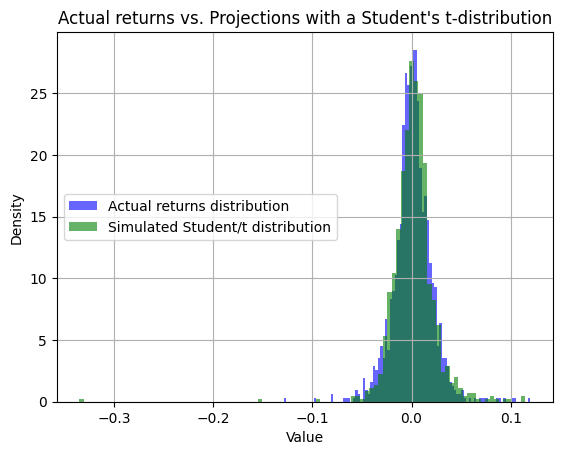

In [37]:

returns.hist(bins=100,density=True, alpha=0.6, color='b', label='Actual returns distribution')

# Plot histogram of results
plt.hist(results, bins=100, density=True, alpha=0.6, color='g', label='Simulated Student/t distribution')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Actual returns vs. Projections with a Student\'s t-distribution')
plt.legend(loc='center left')
plt.grid(True)
plt.show()

In [38]:
t.rvs(df=params[0], loc=params[1], scale=params[2], size=1)

array([-0.00250852])

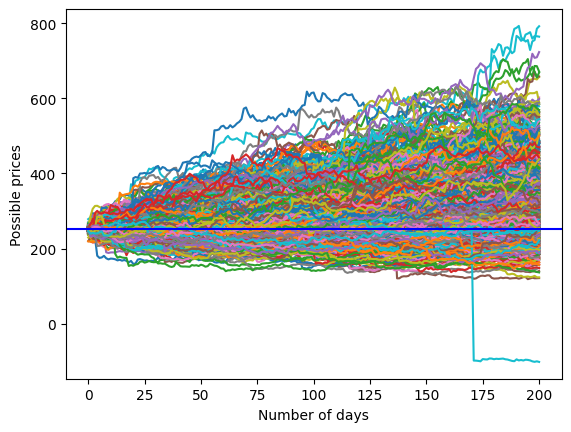

In [39]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

num_simulations = 1000
num_days = 200
simulation_student_t = pd.DataFrame()
for x in range(num_simulations):
    count = 0
    # The first price point
    price_series = []
    rtn = t.rvs(df=params[0], loc=params[1], scale=params[2], size=1)[0]
    price = last_price * (1  + rtn)
    price_series.append(price)
    # Create each price path
    for g in range(num_days):
        rtn = t.rvs(df=params[0], loc=params[1], scale=params[2], size=1)[0]
        price = price_series[g] * (1  + rtn)
        price_series.append(price)
    # Save all the possible price paths
    simulation_student_t[x] = price_series
fig = plt.figure()
plt.plot(simulation_student_t)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()

In [40]:
simulation_student_t

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,249.914457,251.750319,247.812802,251.442312,252.046361,242.523366,249.822050,248.623490,251.630801,252.753269,...,253.289276,249.680012,247.998715,254.575494,253.059875,253.725926,249.716068,243.006570,251.088007,246.657290
1,249.582937,250.876731,250.487991,257.142717,252.919746,241.627499,248.972469,252.509392,253.556556,249.477542,...,251.338399,249.371763,243.484123,246.960053,254.393890,255.351518,246.341701,241.795971,249.543265,239.942749
2,253.984555,256.521165,249.776020,246.758766,255.550637,241.017654,250.898376,248.864174,251.303928,249.833841,...,254.294546,253.738677,243.711153,251.268449,260.416152,246.435806,256.390323,245.305550,242.800080,242.097903
3,256.189790,256.165490,249.398826,245.135590,259.039508,242.263764,250.263202,243.910244,254.938198,249.570414,...,254.192727,252.850786,242.781320,294.665412,261.268527,243.502319,257.904049,242.906647,247.677132,240.233237
4,263.572635,252.038982,258.114069,240.485628,253.547174,239.298314,252.288328,241.944925,254.457147,250.028177,...,242.006312,257.424903,241.385120,300.597087,261.284414,245.782943,257.787609,238.601902,249.467378,240.791901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,312.967859,315.356434,443.464200,255.927362,199.917582,253.291177,298.071196,288.364055,343.091871,423.386725,...,396.998155,163.000466,341.609406,448.834474,358.366439,336.848317,282.998473,303.550527,413.546557,248.404150
197,318.623870,312.568614,463.490767,256.341003,201.431794,253.737537,301.016743,287.704950,340.742444,422.006982,...,395.542521,158.793792,344.408754,460.717258,358.795651,338.399122,282.598458,302.352959,426.088708,251.477469
198,322.175620,321.493304,476.556418,256.573594,200.863592,261.694074,290.923738,294.716584,343.574629,410.923242,...,401.891489,160.819922,343.305922,463.359125,368.453190,333.806443,284.336311,301.244142,421.185685,247.291598
199,323.531785,320.955347,484.777712,257.510819,199.084159,264.401366,291.296730,281.899601,342.086295,407.387514,...,392.115830,161.427168,349.956406,456.869001,372.573469,333.975156,272.976592,299.917100,430.249594,250.823790


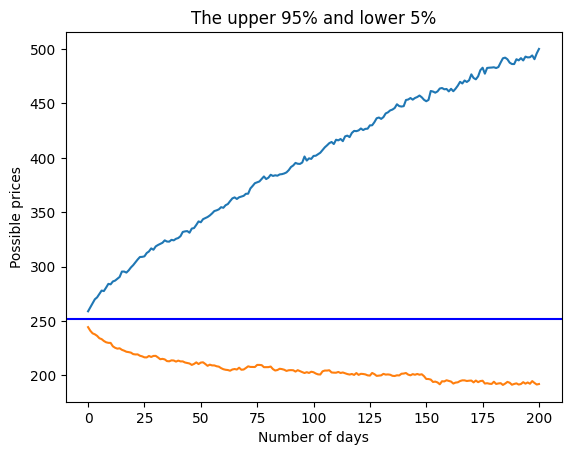

In [41]:
upper = simulation_student_t.quantile(.95, axis=1)
lower = simulation_student_t.quantile(.05, axis=1)
stock_range = pd.concat([upper, lower], axis=1)

fig = plt.figure()
plt.plot(stock_range)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.title('The upper 95% and lower 5%')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()